In [2]:
import pandas as pd

df = pd.read_csv('../data/togo-dapaong_qc.csv', parse_dates=['Timestamp'])

In [3]:
print(df.describe())

                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-25 12:00:30.000000768     230.555040     151.258469   
min              2021-10-25 00:01:00     -12.700000       0.000000   
25%              2022-01-24 06:00:45      -2.200000       0.000000   
50%              2022-04-25 12:00:30       2.100000       0.000000   
75%              2022-07-25 18:00:15     442.400000     246.400000   
max              2022-10-25 00:00:00    1424.000000    1004.500000   
std                              NaN     322.532347     250.956962   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.444352     226.144375     219.568588      27.751788   
min         0.000000       0.000000       0.000000      14.900000   
25%         0.000000       0.000000       0.000000      24.200000   
50%         2.500000    

In [4]:
print(df.shape)

(525600, 19)


In [5]:
missing = df.isna().sum()
print(missing[missing > 0])

Comments    525600
dtype: int64


In [6]:
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 5])

Comments    100.0
dtype: float64


In [7]:
df.drop(columns=['Comments'], inplace=True)

In [8]:
from scipy.stats import zscore

key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_zscores = df[key_cols].apply(zscore)

# Flag rows where any key value has |Z| > 3
outliers = (df_zscores.abs() > 3).any(axis=1)
print(f"Number of outliers: {outliers.sum()}")

Number of outliers: 9251


In [9]:
print(df.dtypes)

Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
dtype: object


In [10]:
df.to_csv(f'../data/togo_clean.csv', index=False)

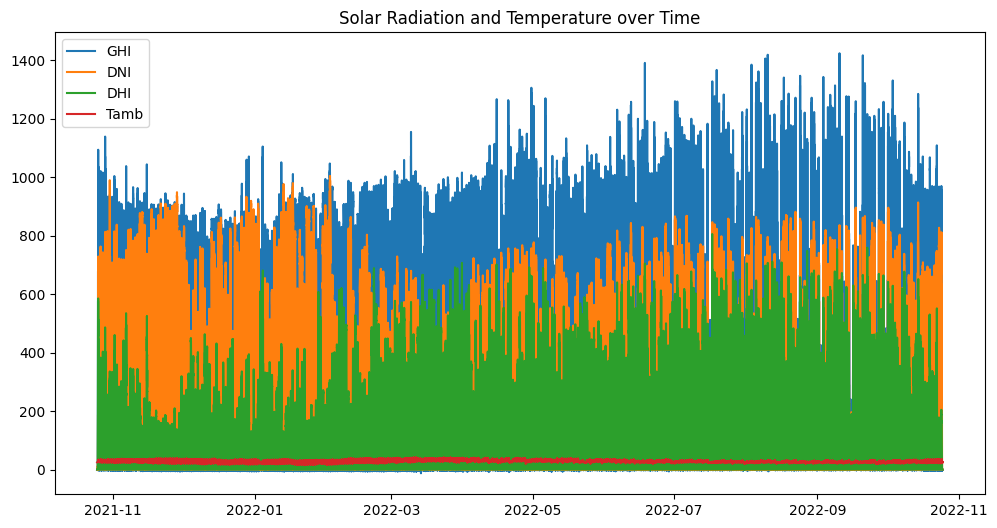

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation and Temperature over Time')
plt.show()

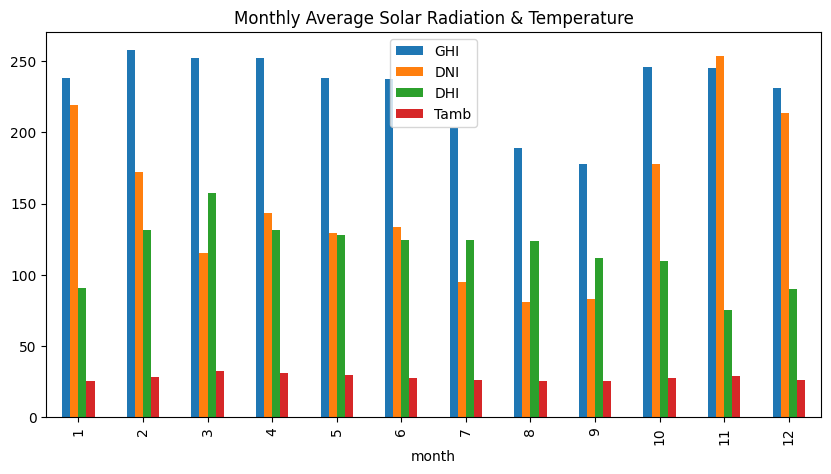

In [12]:
df['month'] = df['Timestamp'].dt.month
monthly_avg = df.groupby('month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
monthly_avg.plot(kind='bar', figsize=(10,5), title='Monthly Average Solar Radiation & Temperature')
plt.show()

In [13]:
print(df['Cleaning'].value_counts())

Cleaning
0    525319
1       281
Name: count, dtype: int64


                ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


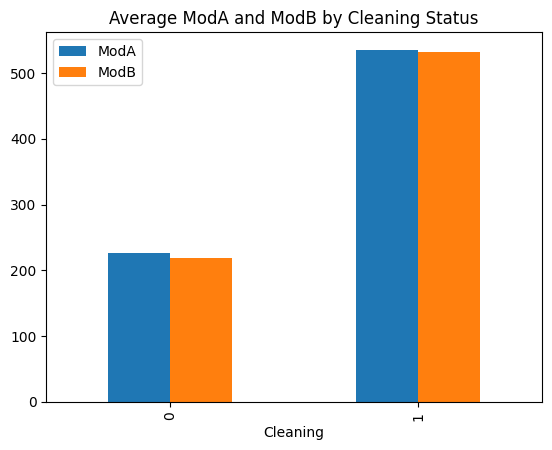

In [14]:
cleaning_avg = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print(cleaning_avg)

cleaning_avg.plot(kind='bar', title='Average ModA and ModB by Cleaning Status')
plt.show()

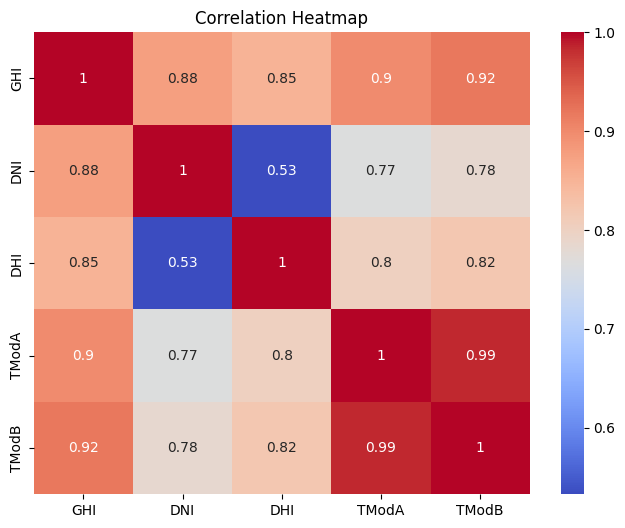

In [15]:
import seaborn as sns

corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

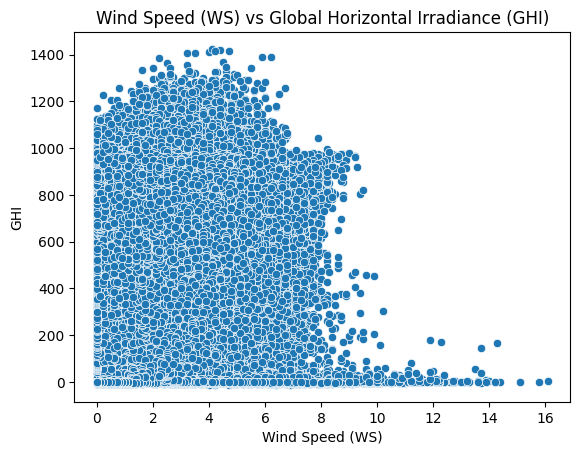

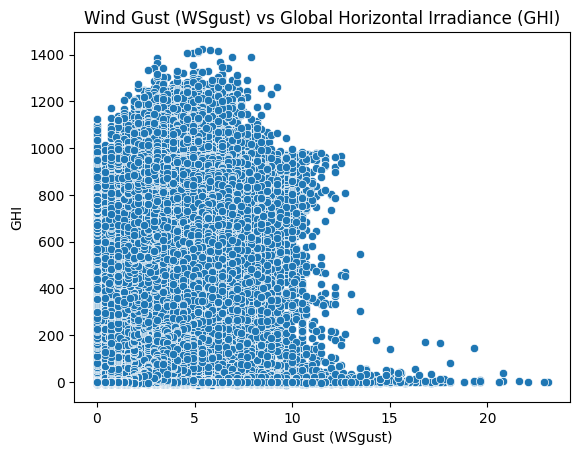

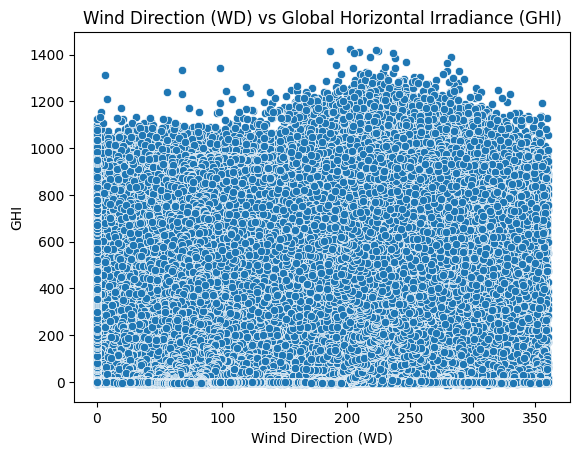

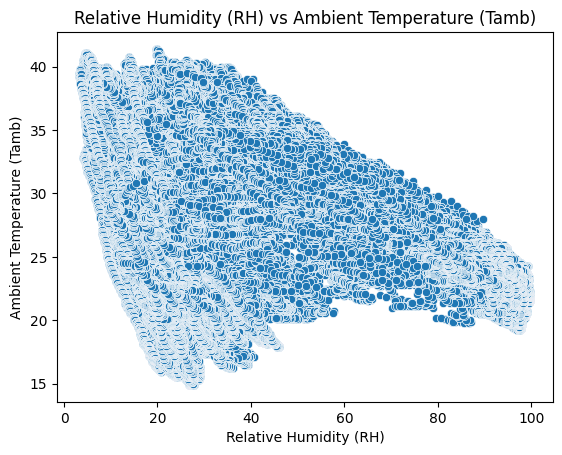

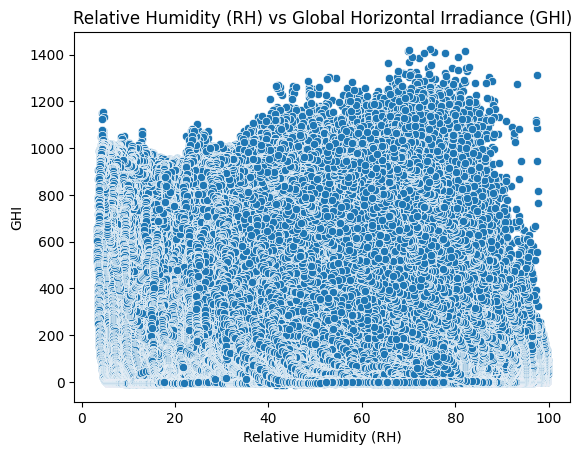

In [16]:
# Scatter plot: Wind Speed vs GHI
sns.scatterplot(x='WS', y='GHI', data=df)
plt.title('Wind Speed (WS) vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.show()

# Scatter plot: Wind Gust vs GHI
sns.scatterplot(x='WSgust', y='GHI', data=df)
plt.title('Wind Gust (WSgust) vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Wind Gust (WSgust)')
plt.ylabel('GHI')
plt.show()

# Scatter plot: Wind Direction vs GHI
sns.scatterplot(x='WD', y='GHI', data=df)
plt.title('Wind Direction (WD) vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Wind Direction (WD)')
plt.ylabel('GHI')
plt.show()

# Scatter plot: Relative Humidity vs Ambient Temperature
sns.scatterplot(x='RH', y='Tamb', data=df)
plt.title('Relative Humidity (RH) vs Ambient Temperature (Tamb)')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.show()

# Scatter plot: Relative Humidity vs GHI
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('GHI')
plt.show()

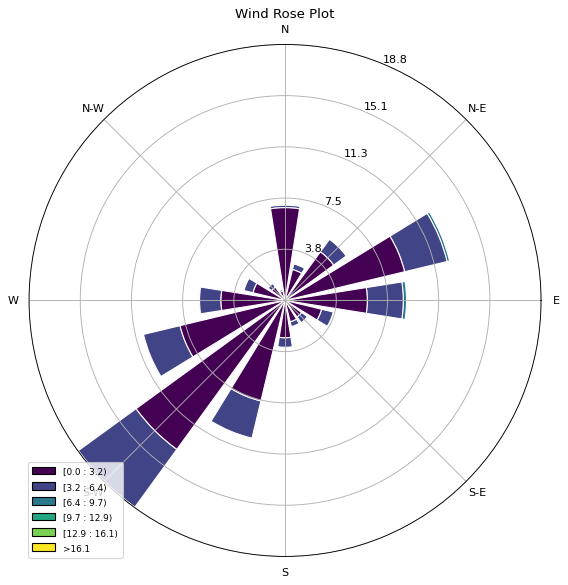

In [17]:
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose Plot')
plt.show()

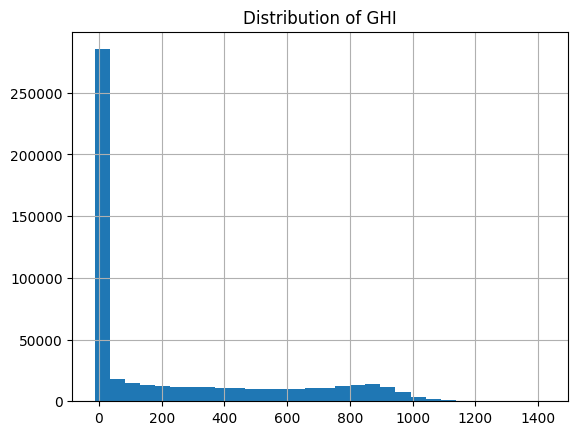

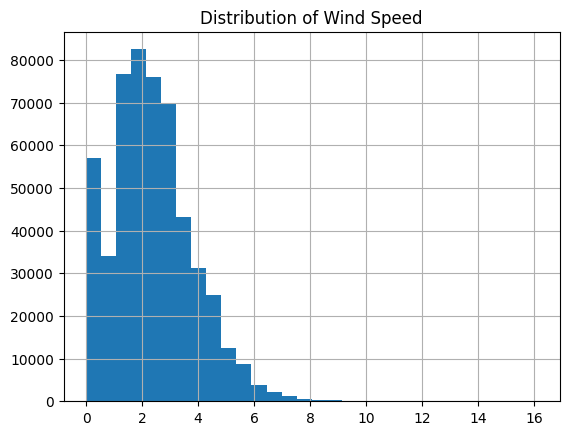

In [18]:
df['GHI'].hist(bins=30)
plt.title('Distribution of GHI')
plt.show()

df['WS'].hist(bins=30)
plt.title('Distribution of Wind Speed')
plt.show()

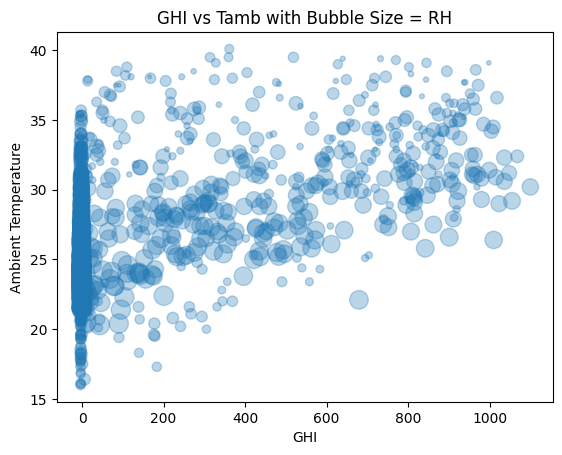

In [19]:
sample = df.sample(1000)
plt.scatter(sample['GHI'], sample['Tamb'], s=sample['RH']*2, alpha=0.3)
plt.xlabel('GHI')
plt.ylabel('Ambient Temperature')
plt.title('GHI vs Tamb with Bubble Size = RH')
plt.show()